## Intern Name - Sachin Patel

# Exploratory Data Analysis - Retail

#Task-2 : As a business manager, try to find out weak areas where you can work to make more profit. 

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# getting general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# getting statistics of dataset
df.describe(include= 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


# Let's analyse our dataset

separating ctegorical and numerical columns

In [5]:
df_columns = df.describe(include= 'all').loc['mean'].isnull()

In [6]:
df_categorical_columns = df_columns[df_columns == True].index

In [7]:
df_numerical_columns = df_columns[df_columns == False].index

In [8]:
df_numerical_columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [9]:
df_categorical_columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

# Univariate Analysis

### Ploting categorical data

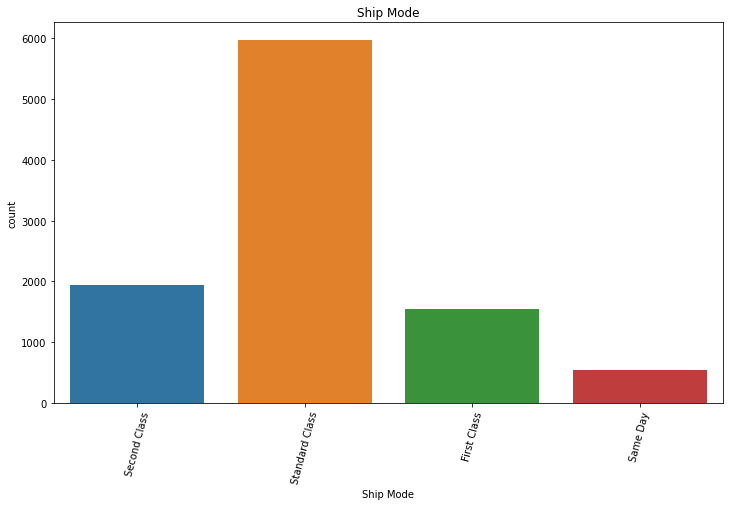

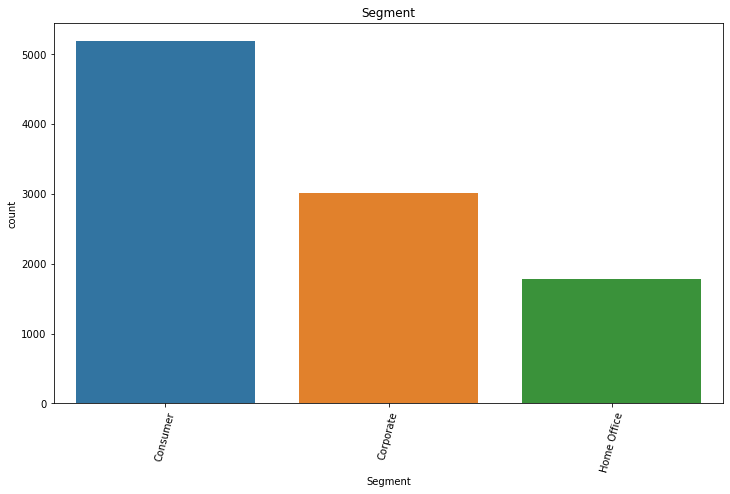

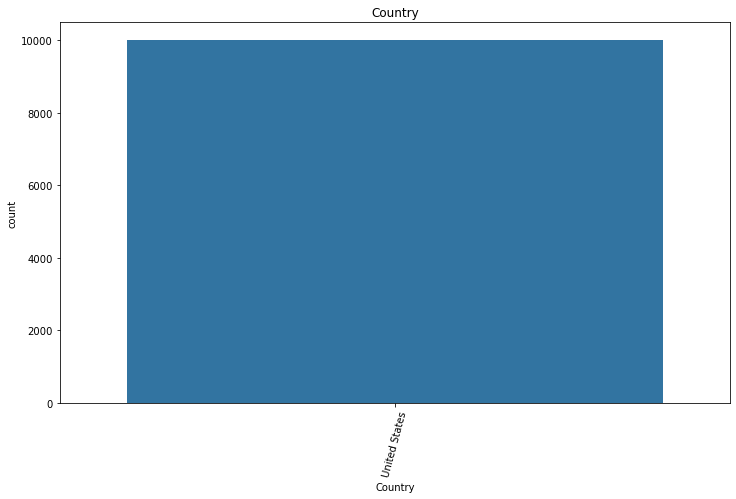

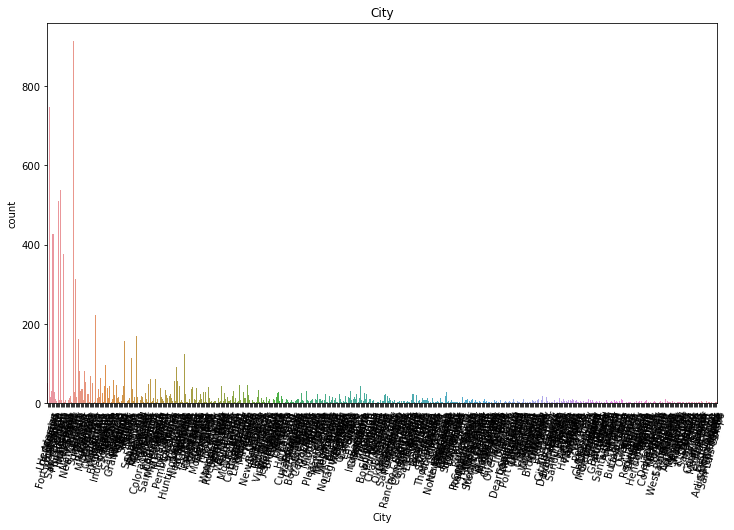

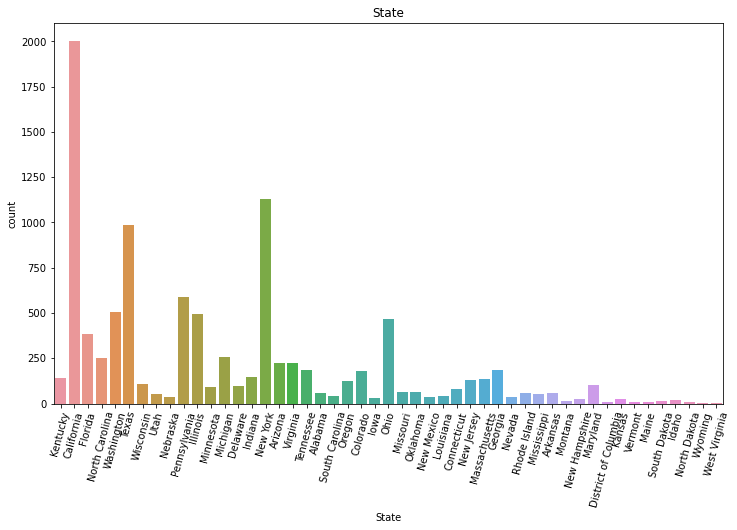

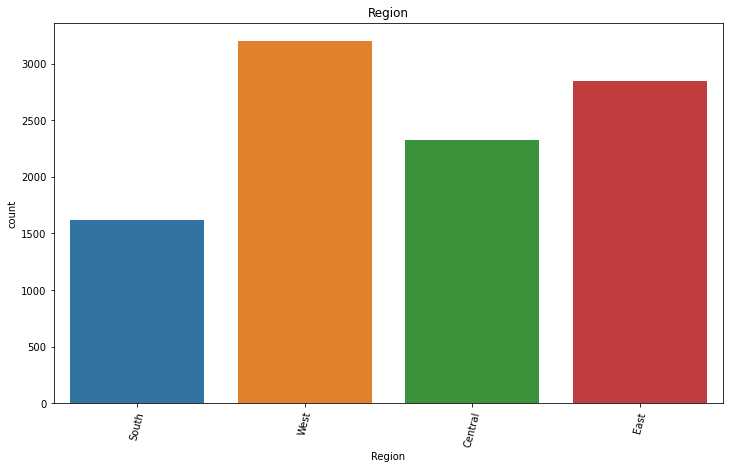

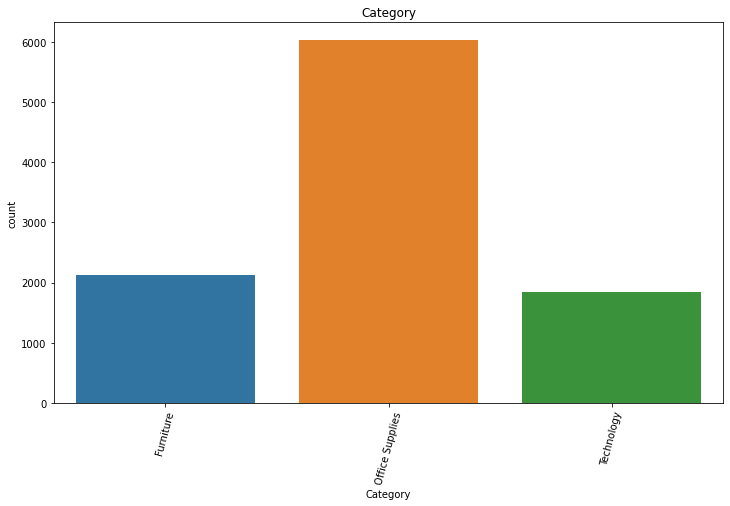

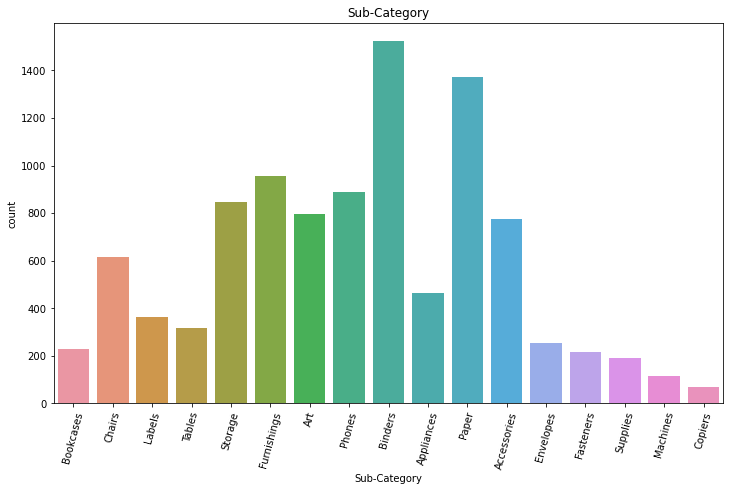

In [10]:
for i in df_categorical_columns: 
    plt.figure(figsize=(12,7))
    plt.xticks(rotation= 75)
    sns.countplot(x= df[i])
    plt.title(i)
    

## ploting numerical data

<AxesSubplot:>

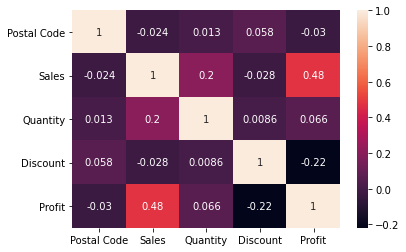

In [11]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

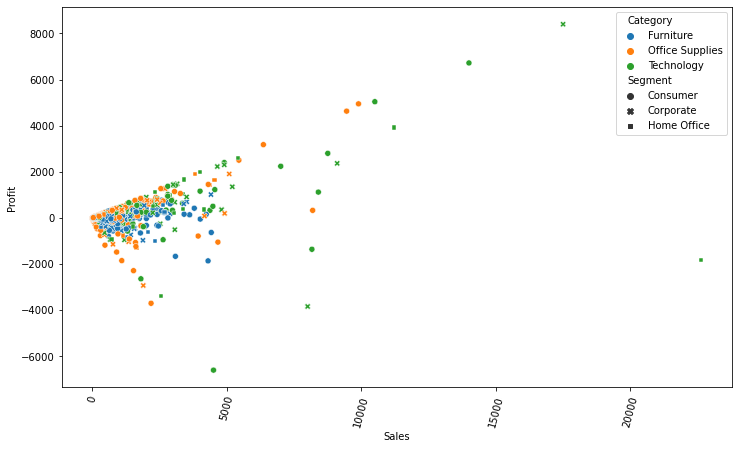

In [12]:
plt.figure(figsize=(12,7))
plt.xticks(rotation= 75)
sns.scatterplot(x= df['Sales'], y= df['Profit'], hue= df['Category'], style=df['Segment'])

# Bivariate analysis

## Analysing total sales and profit in different region

In [13]:
region_wise_1 = df.groupby(['Region'],as_index= False).agg({'Sales':'sum','Profit':'sum'})
region_wise_1

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


Text(0.5, 1.0, 'Total Profits %')

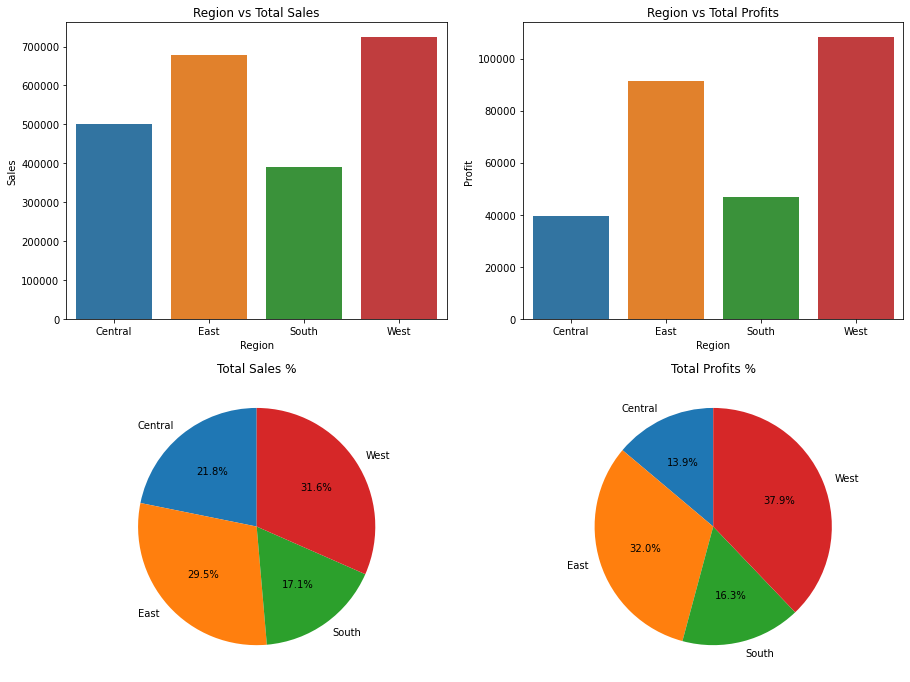

In [14]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.barplot(x= region_wise_1['Region'], y=region_wise_1['Sales']);
plt.title("Region vs Total Sales")

plt.subplot(2,2,2)
sns.barplot(x= region_wise_1['Region'], y=region_wise_1['Profit']);
plt.title("Region vs Total Profits")

plt.subplot(2,2,3)
plt.pie(region_wise_1['Sales'], labels=region_wise_1['Region'], autopct='%1.1f%%', startangle=90);
plt.title("Total Sales %")

plt.subplot(2,2,4)
plt.pie(region_wise_1['Profit'], labels=region_wise_1['Region'], autopct='%1.1f%%', startangle=90);
plt.title("Total Profits %")

Total sales is highest in 'West'(31.6%) and lowest in 'South'(17.1%) region. 
Total profits is higest in 'West'(37.9%) and lowest in 'Central'(13.9%) region.

## Analysing total sales and profit in different category regionwise

In [88]:
region_wise = df.groupby(['Region','Category'],as_index= False).agg({'Sales':'sum','Profit':'sum'})
region_wise

,Region,Category,Sales,Profit
0,Central,Furniture,163797.16,-2871.05
1,Central,Office Supplies,167026.42,8879.98
2,Central,Technology,170416.31,33697.43
3,East,Furniture,208291.20,3046.17
4,East,Office Supplies,205516.05,41014.58
5,East,Technology,264973.98,47462.04
6,South,Furniture,117298.68,6771.21
7,South,Office Supplies,125651.31,19986.39
8,South,Technology,148771.91,19991.83
9,West,Furniture,252612.74,11504.95


Text(0.5, 1.0, 'TOTAL PROFIT')

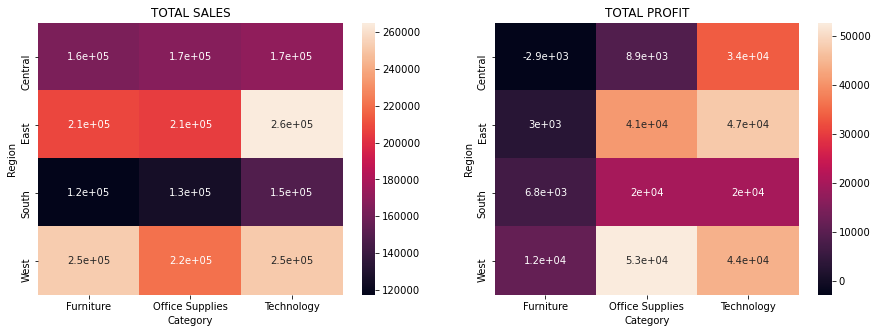

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(region_wise.pivot(index="Region", columns="Category", values="Sales"), annot= True);
plt.title("TOTAL SALES")

plt.subplot(1,2,2)
sns.heatmap(region_wise.pivot(index="Region", columns="Category", values="Profit"), annot= True);
plt.title("TOTAL PROFIT")

From TOTAL SALES plot, it is clear that SOUTH region has lowest as sales compared to other region. And from TOTAL PROFIT plot we can see that 'Furniture' category is least profitable.

Text(0.5, 1.0, 'Region vs Sales')

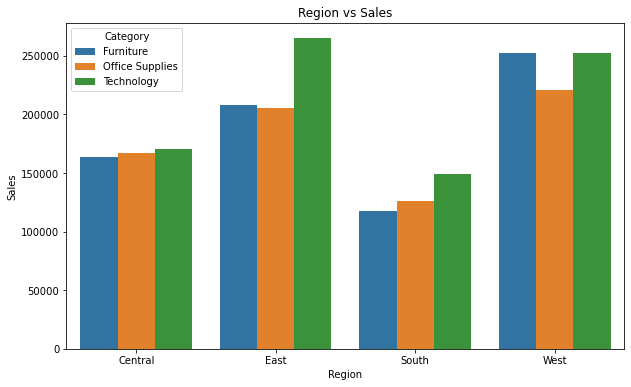

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x= region_wise['Region'], y= region_wise['Sales'], hue= region_wise['Category'])
plt.title("Region vs Sales")

Products in 'Technology' Category has higest sales in all regions.

Text(0.5, 1.0, 'Region vs Profit')

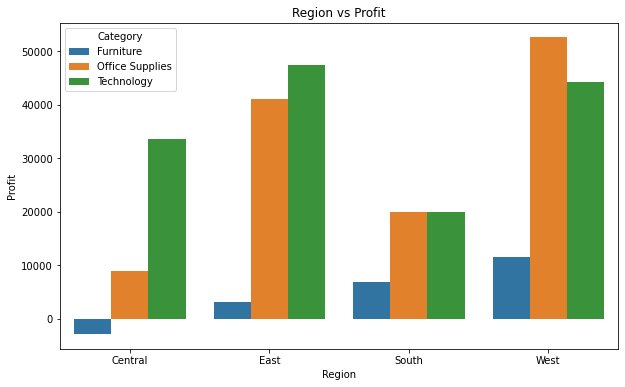

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x= region_wise['Region'], y= region_wise['Profit'], hue= region_wise['Category'])
plt.title("Region vs Profit")

'Furniture' category in Central region is in Loss. And also least profitable compared to other category products.

## Analysing sales and profit with respect to Category column

In [18]:
category_wise = df.groupby('Category', as_index= False).agg({'Sales':'sum','Quantity':'sum','Discount':'mean','Profit':'sum'})
category_wise

,Category,Sales,Quantity,Discount,Profit
0,Furniture,741999.7953,8028,0.173923,18451.2728
1,Office Supplies,719047.0320,22906,0.157285,122490.8008
2,Technology,836154.0330,6939,0.132323,145454.9481


Text(0.5, 1.0, 'category vs Discount')

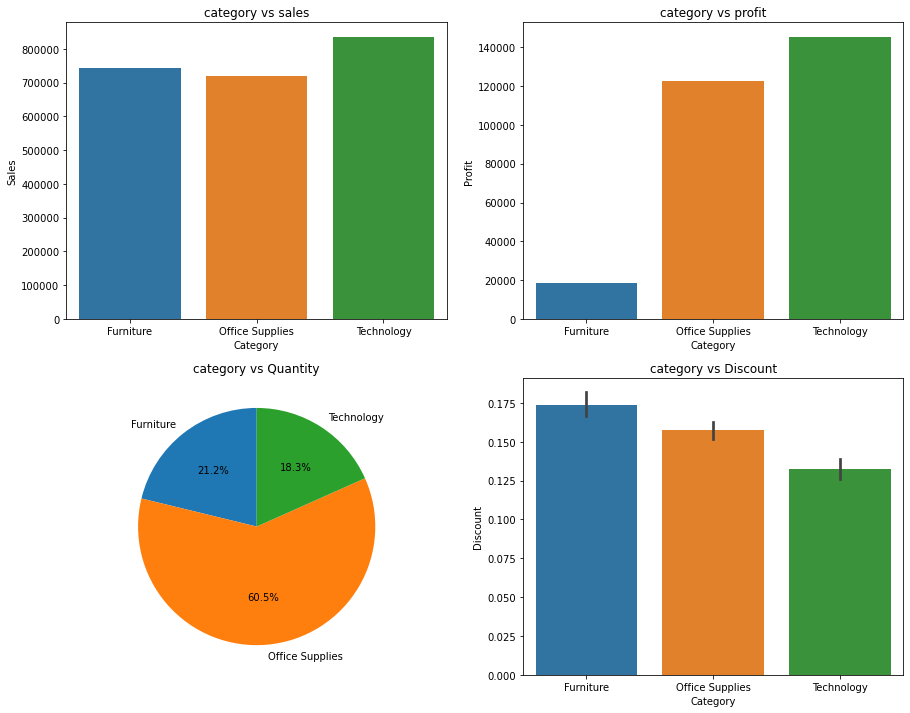

In [82]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.barplot(x= category_wise['Category'], y= category_wise['Sales'])
plt.title("category vs sales")

plt.subplot(2,2,2)
sns.barplot(x= category_wise['Category'], y= category_wise['Profit'])
plt.title("category vs profit")

plt.subplot(2,2,3)
plt.pie(category_wise['Quantity'], labels=category_wise['Category'], autopct='%1.1f%%', startangle=90);
plt.title("category vs Quantity")

plt.subplot(2,2,4)
sns.barplot(x= df['Category'], y= df['Discount'])
plt.title("category vs Discount")

Quantity_wise, 'Office Supplies' is the most sold product category (60.5%) and least sold is 'Technology'(18.3%) and 'Technology' is most profitable category.

## Analysing Sub-Categories with respect to Quantity, Sales and Profits

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

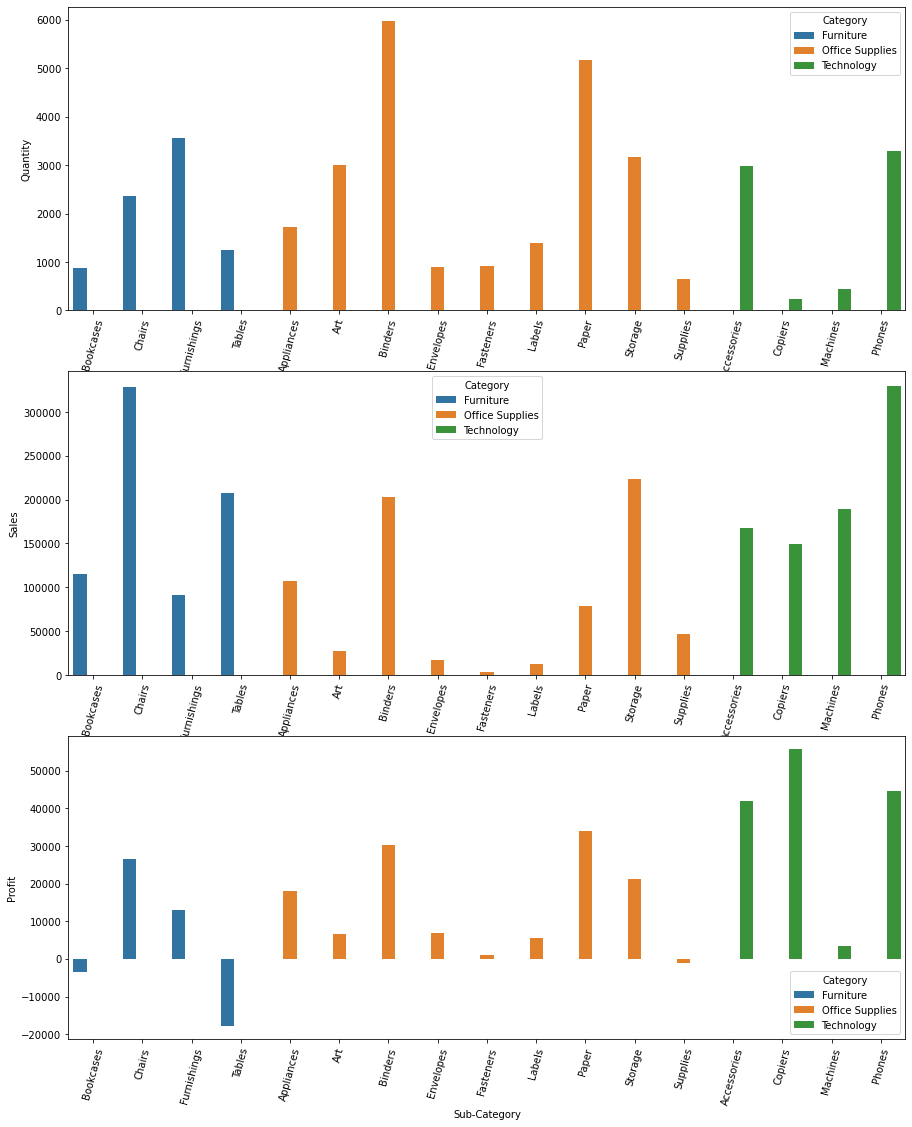

In [20]:
plt.figure(figsize=(15,19))

plt.subplot(3,1,1)
sub_category = df.groupby(['Category','Sub-Category'], as_index= False)[['Quantity']].sum()
plt.xticks(rotation= 75)
sns.barplot(x= sub_category['Sub-Category'], y= sub_category['Quantity'], hue= sub_category['Category'])

plt.subplot(3,1,2)
sub_cat_sales = df.groupby(['Category','Sub-Category'], as_index= False)[['Sales']].sum()
plt.xticks(rotation= 75)
sns.barplot(x= sub_cat_sales['Sub-Category'], y= sub_cat_sales['Sales'], hue= sub_cat_sales['Category'])

plt.subplot(3,1,3)
sub_cat_profits = df.groupby(['Category','Sub-Category'], as_index= False)[['Profit']].sum()
plt.xticks(rotation= 75)
sns.barplot(x= sub_cat_profits['Sub-Category'], y= sub_cat_profits['Profit'], hue= sub_cat_profits['Category'])

Profits on 'Bookcases','Tables'and 'Supplies' are 'negative'.

## Analysing Sales and Profit with respect to Segment

In [21]:
segment = df.groupby('Segment', as_index= False).agg({'Sales':'sum','Quantity':'sum','Discount':'mean','Profit':'sum'})
segment

,Segment,Sales,Quantity,Discount,Profit
0,Consumer,1.161401e+06,19521,0.158141,134119.2092
1,Corporate,7.061464e+05,11608,0.158228,91979.1340
2,Home Office,4.296531e+05,6744,0.147128,60298.6785


Text(0.5, 1.0, 'Profit vs Segment')

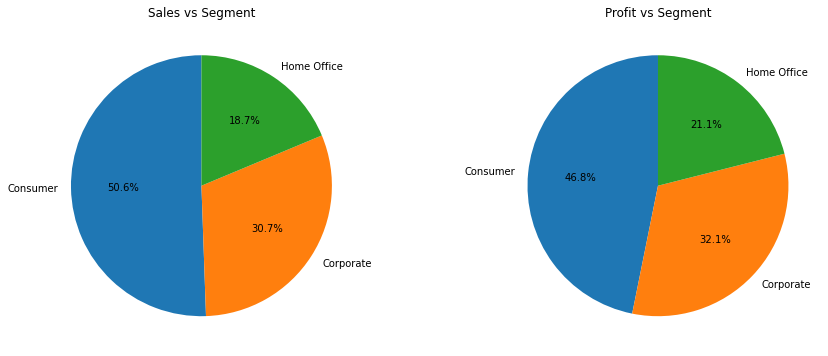

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(segment['Sales'], labels=segment['Segment'], autopct='%1.1f%%', startangle=90);
plt.title("Sales vs Segment")

plt.subplot(1,2,2)
plt.pie(segment['Profit'], labels=segment['Segment'], autopct='%1.1f%%', startangle=90);
plt.title("Profit vs Segment")

 50.6% of total sales comes from 'consumer segment', 30.7% of total sales comes from 'Corporate' and 18.7% of total sales comes from 'Home Office'.

# Analysing sales and profit in different states

In [37]:
state_df = df.groupby(['Region','State'], as_index= False).agg({'Sales':'sum','Quantity':'sum','Discount':'mean','Profit':'sum'})


Text(0.5, 1.0, 'TOTAL PROFITS')

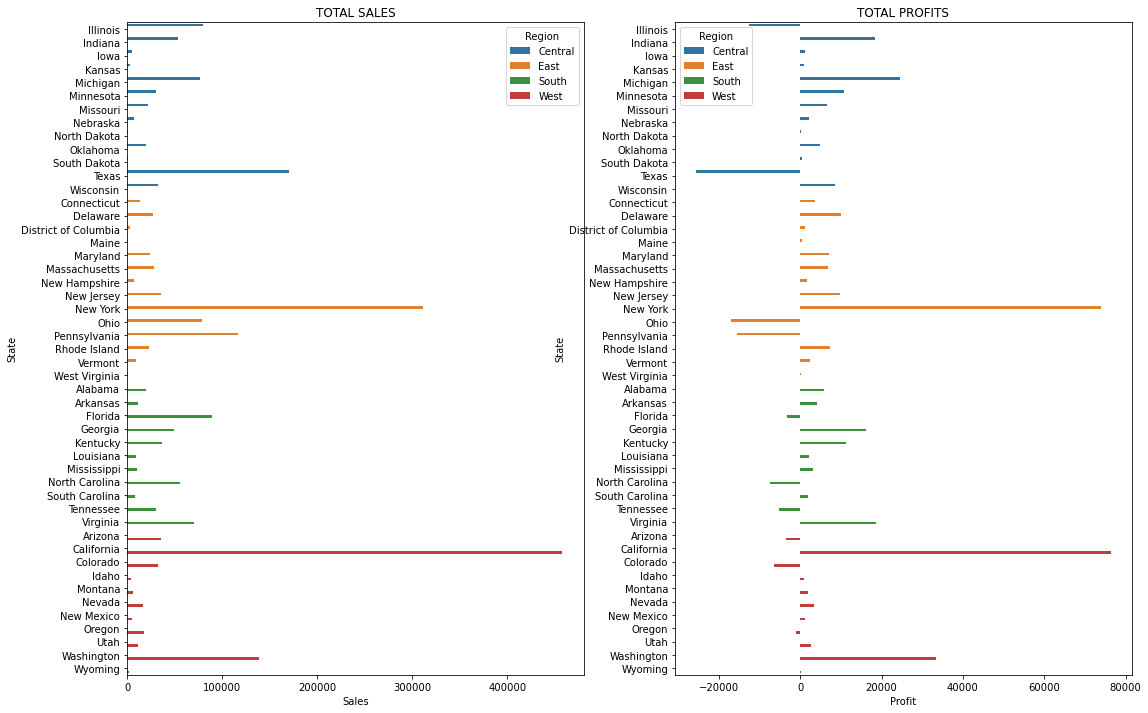

In [68]:
plt.figure(figsize=(18,12))

plt.subplot(1,2,1)
sns.barplot(x= state_df['Sales'], y= state_df['State'], hue= state_df['Region'])
plt.title("TOTAL SALES")

plt.subplot(1,2,2)
sns.barplot(x= state_df['Profit'], y= state_df['State'], hue= state_df['Region'])
plt.title("TOTAL PROFITS")

From above plot we can infer that CALIFORNIA has highest sales and profit in WEST region, NEWYORK has highest sales and profit in EAST region. TEXAS has highest sales in CENTRAL region but profits are negative, similarly FLORIDA has highest sales in SOUTH region but profits are negative.

##### Let's further investigate for Texas

In [81]:
df[df['State']=='Texas'].groupby(['Category']).agg({'Sales':'sum','Quantity':'sum','Discount':'max','Profit':'sum'})

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,60593.29,766,0.60,-10436.14
Office Supplies,44490.53,2299,0.80,-18584.64
Technology,65104.22,659,0.40,3291.43


So, in Texas profits in 'Furniture' and 'Office Supplies' categories are Negative and the reason could be High Discount, i.e. about 60% and 80% respectively.

# Summary

Following are the observations made from above analysis:-

1) Total sales is highest in 'West'(31.6%) and lowest in 'South'(17.1%) region. Total profits is highest in 'West'(37.9%) and lowest in 'Central'(13.9%) region.

2) Products in 'Technology' Category has highest sales in all regions.

3) 'Furniture' category in Central region is in Loss. And also least profitable compared to other category products.

4) Quantity_wise, 'Office Supplies' is the most sold product category (60.5%) and least sold is 'Technology'(18.3%) and 'Technology' is most profitable category.

5) Profits on 'Bookcases','Tables'and 'Supplies' are 'negative'.

6) 50.6% of total sales comes from 'consumer segment', 30.7% of total sales comes from 'Corporate' and 18.7% of total sales comes from 'Home Office'.

7) Texas and Florida has highest sales in their respective region, but Profits are negative.

# Tableau Dashboard Link

#### Project dashboard link in Tableau

link:-   https://public.tableau.com/app/profile/sachin.patel8488/viz/RetailDashboard_16498598655240/RetailDashboard